In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
gt=pd.read_csv('gas_turbines.csv')
gt

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
gt.shape

(15039, 11)

In [4]:
gt.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [5]:
gt=gt.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO',
       'NOX','TEY']]

In [6]:
gt

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559,111.61
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917,111.78
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912,110.19
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227,110.74


In [7]:
x=gt.iloc[:,0:-1]
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [8]:
y=gt.iloc[:,-1]
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [9]:
gt.shape

(15039, 11)

In [10]:
gt.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
TEY     0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

# creating model

In [13]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_dim=10,activation='ReLU'))
model.add(tf.keras.layers.Dense(10,activation='ReLU'))
model.add(tf.keras.layers.Dense(1,activation='ReLU'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                165       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 336
Trainable params: 336
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='mse',optimizer='adam',metrics=['mse','mae'])

In [16]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=1000)

Epoch 1/50
13/13 [==============================] - 1s 21ms/step - loss: 18278.8848 - mse: 18278.8848 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 18278.8848 - mse: 18278.8848 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 18278.8867 - mse: 18278.8867 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 18278.8867 - mse: 18278.8867 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 18278.8848 - mse: 18278.8848 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 18278.8848 - mse:

Epoch 46/50
13/13 [==============================] - 0s 5ms/step - loss: 18278.8867 - mse: 18278.8867 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 47/50
13/13 [==============================] - 0s 5ms/step - loss: 18278.8848 - mse: 18278.8848 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 48/50
13/13 [==============================] - 0s 4ms/step - loss: 18278.8867 - mse: 18278.8867 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 49/50
13/13 [==============================] - 0s 4ms/step - loss: 18278.8867 - mse: 18278.8867 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 50/50
13/13 [==============================] - 0s 4ms/step - loss: 18278.8828 - mse: 18278.8828 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587


In [17]:
model.save_weights("mywt.kmw")

In [18]:
scores=model.evaluate(x_train,y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

376/376 [==============================] - 1s 2ms/step - loss: 18278.8887 - mse: 18278.8887 - mae: 134.2709
mse: 1827888.87%


In [19]:
model.history.history.keys()
import matplotlib.pyplot as plt

In [20]:
history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

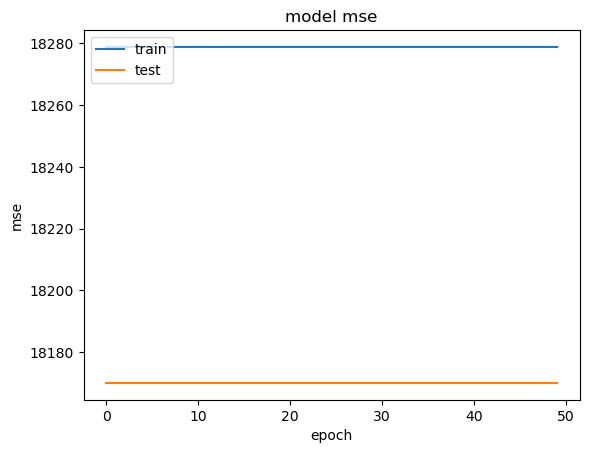

In [21]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

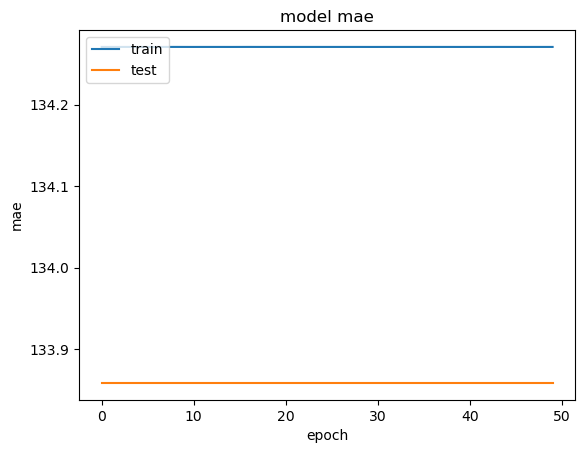

In [22]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

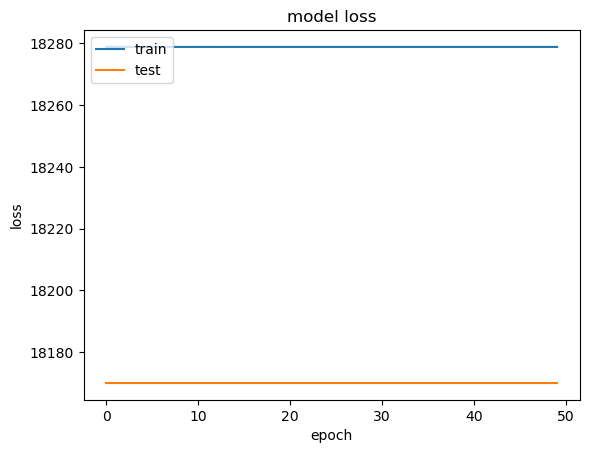

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

from sklearn.metrics import mean_squared_error

train_rmse=mean_squared_error(y_train,y_train_pred,squared=False)
test_rmse=mean_squared_error(y_test,y_test_pred,squared=False)

print('Training set rmse: %.3f, Testing set rmse: %.3f' % (train_rmse,test_rmse))

94/94 [==============================] - 0s 2ms/step
Training set rmse: 135.199, Testing set rmse: 134.796


# randomzied search  cv

In [25]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor

In [26]:
def keras_reg_model(learning_rate,activation_function,init,neuron1,neuron2):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(neuron1,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(tf.keras.layers.Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(tf.keras.layers.Dense(1,activation = 'linear'))
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'mse',optimizer = adam,metrics = ['mse','mae'])
    return model

In [28]:
keras_reg = KerasRegressor(build_fn = keras_reg_model,verbose = 0)

In [29]:
batch_size = [10,50,100,500,1000,2000]
epochs = [25,50,80,100,150]
learning_rate = [0.001,0.01,0.1]

activation_function = ['elu','relu','linear']
init = ['uniform','normal','zero']
neuron1 = [5,10,20,30]
neuron2 = [5,10,20,30]


param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)


random_search = RandomizedSearchCV(estimator = keras_reg,param_distributions = param_grids,cv = 5,n_jobs=-1,verbose = 10,
                                   random_state=40)
random_result = random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [30]:
print('Best score:',random_result.best_score_)
print('Best parameters:',random_result.best_params_)

Best score: -2.590811514854431
Best parameters: {'neuron2': 5, 'neuron1': 20, 'learning_rate': 0.01, 'init': 'uniform', 'epochs': 100, 'batch_size': 500, 'activation_function': 'linear'}


In [31]:
d1= random_result.best_params_

keras_tuned=keras_reg_model(learning_rate=d1['learning_rate'],activation_function=d1['activation_function'],init=d1['init'],
                                                                                       neuron1=d1['neuron1'],neuron2=d1['neuron2'])
history2=keras_tuned.fit(x_train, y_train, validation_data=(x_test,y_test),
                         epochs =d1['epochs'], batch_size=d1['batch_size'])

Epoch 1/100
25/25 [==============================] - 1s 13ms/step - loss: 2192.6287 - mse: 2192.6287 - mae: 35.4579 - val_loss: 316.3797 - val_mse: 316.3797 - val_mae: 15.3398
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 296.5383 - mse: 296.5383 - mae: 13.8897 - val_loss: 261.3301 - val_mse: 261.3301 - val_mae: 13.0479
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 222.0422 - mse: 222.0422 - mae: 11.3303 - val_loss: 206.6396 - val_mse: 206.6396 - val_mae: 11.0287
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 197.2521 - mse: 197.2521 - mae: 10.2267 - val_loss: 189.1409 - val_mse: 189.1409 - val_mae: 9.7705
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 180.1521 - mse: 180.1521 - mae: 9.7322 - val_loss: 170.9171 - val_mse: 170.9171 - val_mae: 9.5109
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 161.5732 - mse: 161.5732 - mae: 9.2876 - val_loss: 161.0142 - 

25/25 [==============================] - 0s 6ms/step - loss: 9.5484 - mse: 9.5484 - mae: 2.5852 - val_loss: 19.3837 - val_mse: 19.3837 - val_mae: 4.1539
Epoch 51/100
25/25 [==============================] - 0s 7ms/step - loss: 9.5627 - mse: 9.5627 - mae: 2.6127 - val_loss: 21.2625 - val_mse: 21.2625 - val_mae: 4.3774
Epoch 52/100
25/25 [==============================] - 0s 7ms/step - loss: 8.9809 - mse: 8.9809 - mae: 2.4217 - val_loss: 4.9844 - val_mse: 4.9844 - val_mae: 1.8903
Epoch 53/100
25/25 [==============================] - 0s 6ms/step - loss: 4.3161 - mse: 4.3161 - mae: 1.6429 - val_loss: 7.2390 - val_mse: 7.2390 - val_mae: 2.3390
Epoch 54/100
25/25 [==============================] - 0s 7ms/step - loss: 7.7926 - mse: 7.7926 - mae: 2.3346 - val_loss: 27.7443 - val_mse: 27.7443 - val_mae: 5.0671
Epoch 55/100
25/25 [==============================] - 0s 7ms/step - loss: 12.7891 - mse: 12.7891 - mae: 2.9459 - val_loss: 3.2444 - val_mse: 3.2444 - val_mae: 1.4863
Epoch 56/100
25/25 [=

Epoch 100/100
25/25 [==============================] - 0s 5ms/step - loss: 4.1607 - mse: 4.1607 - mae: 1.6402 - val_loss: 3.8748 - val_mse: 3.8748 - val_mae: 1.6798


In [32]:
y_train_pred_tuned= keras_tuned.predict(x_train)
y_test_pred_tuned= keras_tuned.predict(x_test)

from sklearn.metrics import mean_squared_error

train_rmse_tuned = mean_squared_error(y_train,y_train_pred_tuned,squared=False)
test_rmse_tuned = mean_squared_error(y_test, y_test_pred_tuned,squared=False)

print('Training set rmse : %.3f, Testing set rmse: %.3f' % (train_rmse_tuned, test_rmse_tuned))

94/94 [==============================] - 0s 2ms/step
Training set rmse : 2.001, Testing set rmse: 1.968


In [33]:
result=pd.DataFrame({'models':['base model','tuned model'],'train rmse':[train_rmse,train_rmse_tuned],
                     'test rmse':[test_rmse,test_rmse_tuned]})
result

,models,train rmse,test rmse
0,base model,135.199430,134.796142
1,tuned model,2.000847,1.968453
